<a href="https://colab.research.google.com/github/taeyoonnoh/Kaggle-Competition/blob/main/Speech_Classification/My_TensorFlow_Speech_Recognition_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/new_train.zip

In [16]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import librosa
import IPython.display as ipd
from scipy.io import wavfile

import os

In [7]:
train_audio_path = '/content/audio'

In [ ]:
/bird/0132a06d_nohash_0.wav

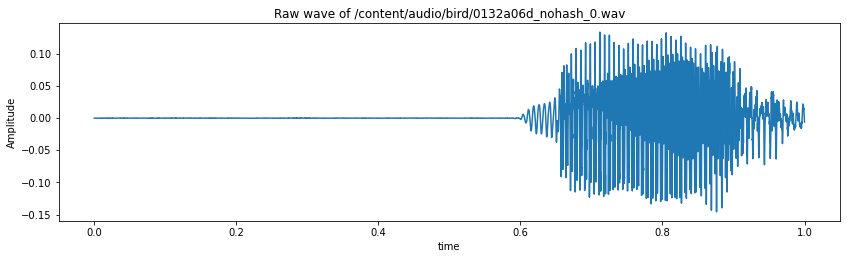

In [8]:
samples, sample_rate = librosa.load(train_audio_path+'/bird/0132a06d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '/content/audio/bird/0132a06d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [9]:
samples

array([ 6.1035156e-05,  0.0000000e+00,  0.0000000e+00, ...,
       -4.6081543e-03, -5.7373047e-03, -6.0119629e-03], dtype=float32)

In [10]:
sample_rate

16000

In [11]:
ipd.Audio(samples, rate=sample_rate)

In [12]:
print(sample_rate)

16000


In [14]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [17]:
labels=os.listdir(train_audio_path)
labels

['dog', 'cat', 'down', 'bird', 'bed']

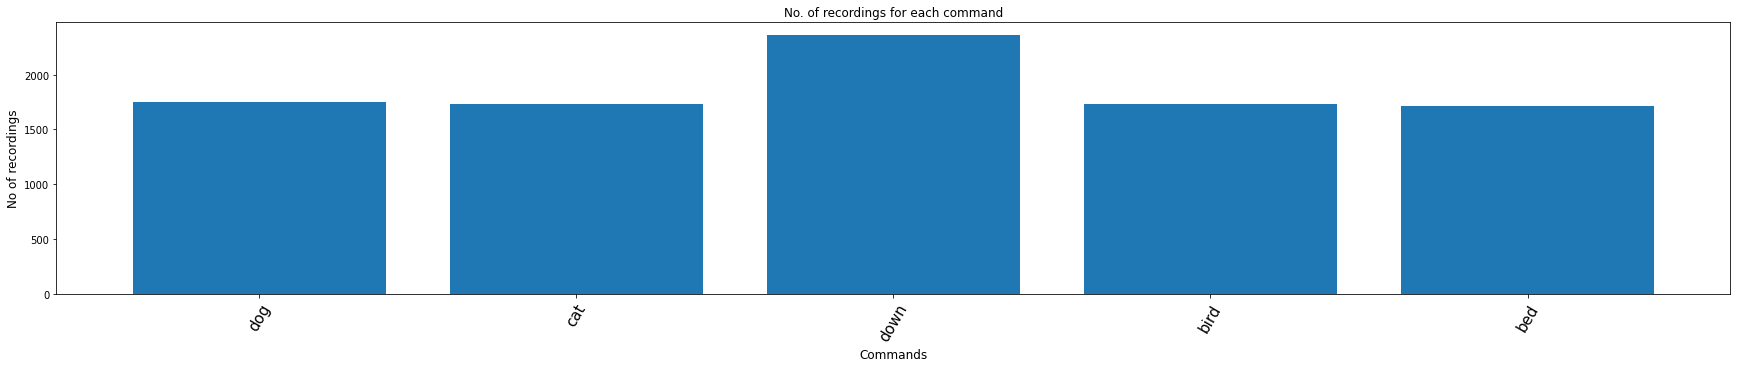

In [18]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

(array([  17.,   11.,   16.,   26.,  103.,   84.,  181.,  147.,  274.,
        8423.]),
 array([0.4644375 , 0.51799375, 0.57155   , 0.62510625, 0.6786625 ,
        0.73221875, 0.785775  , 0.83933125, 0.8928875 , 0.94644375,
        1.        ]),
 <a list of 10 Patch objects>)

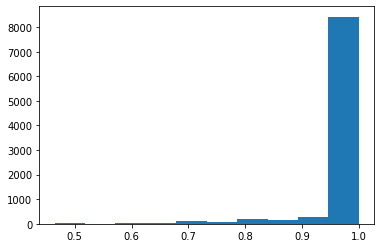

In [19]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [20]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

dog
cat
down
bird
bed


In [21]:
print(type(all_wave))
print(len(all_wave))

<class 'list'>
8219


In [22]:
print(all_wave[1].shape)
all_wave[1]

(8000,)


array([-0.03070678, -0.04765277, -0.04308694, ..., -0.04053465,
       -0.0456495 , -0.04826156], dtype=float32)

In [23]:
all_wave[0]

array([0.00410284, 0.00920296, 0.01273689, ..., 0.02102152, 0.02009696,
       0.01239738], dtype=float32)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [25]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))
y

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [27]:
np.array(all_wave).shape

(8219, 8000)

In [28]:
all_wave = np.array(all_wave).reshape(-1,8000,1)
all_wave.shape

(8219, 8000, 1)

In [29]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [30]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [33]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
206/206 [==============================] - 36s 169ms/step - loss: 1.5348 - accuracy: 0.2960 - val_loss: 1.3644 - val_accuracy: 0.4112
Epoch 2/100
206/206 [==============================] - 34s 166ms/step - loss: 1.3047 - accuracy: 0.4231 - val_loss: 1.2725 - val_accuracy: 0.4659
Epoch 3/100
206/206 [==============================] - 34s 167ms/step - loss: 1.0742 - accuracy: 0.5606 - val_loss: 0.9404 - val_accuracy: 0.6417
Epoch 4/100
206/206 [==============================] - 34s 167ms/step - loss: 0.9303 - accuracy: 0.6360 - val_loss: 0.8123 - val_accuracy: 0.6910
Epoch 5/100
206/206 [==============================] - 35s 168ms/step - loss: 0.8156 - accuracy: 0.6748 - val_loss: 0.8491 - val_accuracy: 0.6770
Epoch 6/100
206/206 [==============================] - 34s 167ms/step - loss: 0.7282 - accuracy: 0.7205 - val_loss: 0.6927 - val_accuracy: 0.7579
Epoch 7/100
206/206 [==============================] - 35s 168ms/step - loss: 0.6446 - accuracy: 0.7553 - val_loss: 0.6399 -

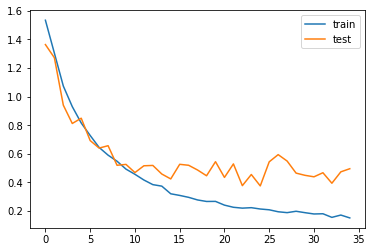

In [34]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [35]:
from keras.models import load_model
#model=load_model('/kaggle/working/best_model.hdf5')

In [36]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [41]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: cat


In [42]:
print("Text:",predict(samples))

Text: cat


In [147]:
#reading the voice commands
samples, sample_rate = librosa.load('/content/bird.wav', sr = 16000)
# samples, sample_rate = librosa.load('/content/dog.wav', sr = 16000)
# samples, sample_rate = librosa.load('/content/cat.wav', sr = 16000)
# samples, sample_rate = librosa.load('/content/down.wav', sr = 16000)
# samples, sample_rate = librosa.load('/content/bed.wav', sr = 16000)
# samples, sample_rate = librosa.load('/content/sister_bird.wav', sr = 16000)
# samples, sample_rate = librosa.load('/content/mom_cat.wav', sr = 16000)
# samples, sample_rate = librosa.load('/content/mom_bird.wav', sr = 16000)

samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)   

In [148]:
def change(sample) : 
    if len(sample) != 8000 : 
        zeros = [0] * (8000-len(sample))
        sample = np.concatenate([samples,np.array(zeros)])
    return sample

In [149]:
samples = change(samples)

In [150]:
#converting voice commands to text
predict(samples)

'bird'